In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
from sklearn.datasets import load_wine
plt.style.use("cyberpunk")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Creating the Dataset
wine=load_wine()
df=pd.DataFrame(wine["data"],columns=wine["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df=df.rename(columns={"od280/od315_of_diluted_wines":"% of diluted_wines"})

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
y=wine["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
df["label"]=y
data_pycaret=df.copy()
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,% of diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,% of diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


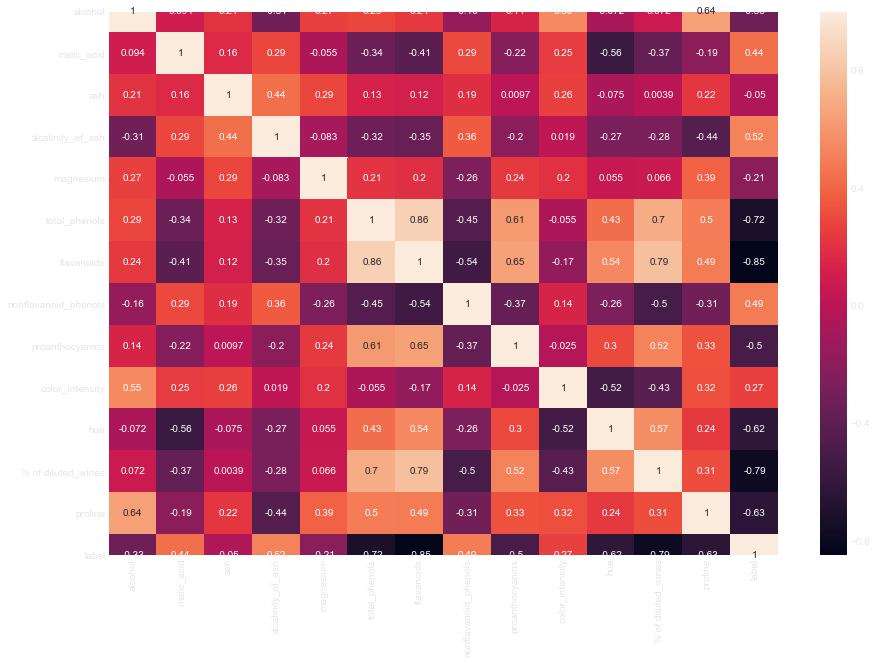

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
% of diluted_wines      0
proline                 0
label                   0
dtype: int64

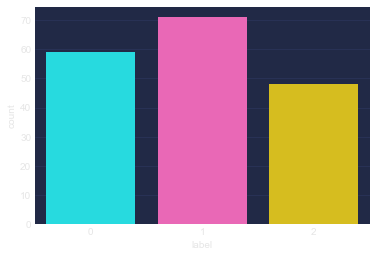

In [10]:
#Data Visualization
sns.countplot(df["label"])
mplcyberpunk.add_glow_effects()
plt.show()

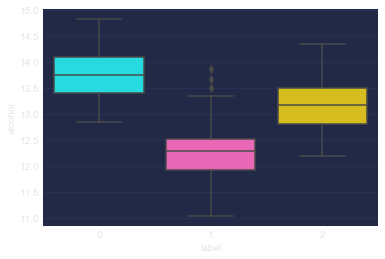

In [11]:
sns.boxplot("label","alcohol",data=df)

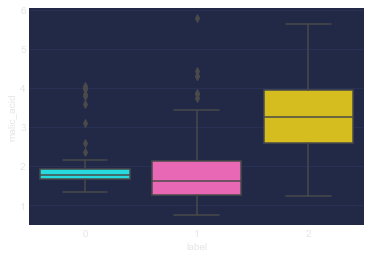

In [12]:
sns.boxplot("label","malic_acid",data=df)

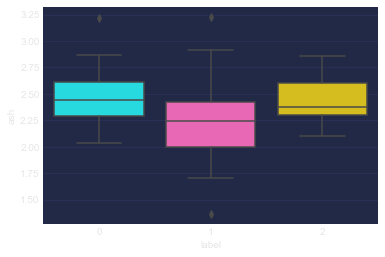

In [13]:
sns.boxplot("label","ash",data=df)

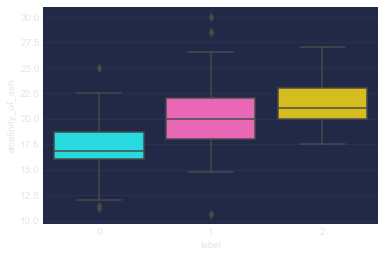

In [14]:
sns.boxplot("label","alcalinity_of_ash",data=df)

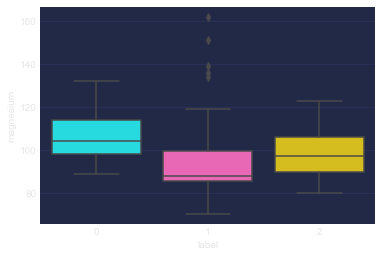

In [15]:
sns.boxplot("label","magnesium",data=df)

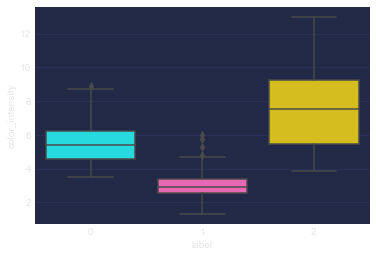

In [16]:
sns.boxplot("label","color_intensity",data=df)

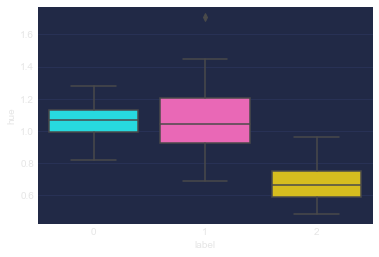

In [17]:
sns.boxplot("label","hue",data=df)

In [18]:
#Splitting the Data into Train and Test sets
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])
sc=StandardScaler()
x=sc.fit_transform(df.iloc[:,:-1])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],y,test_size=0.2,random_state=2)

In [20]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)

In [21]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



In [22]:
#K Nearest Neighbor
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



In [24]:
#Support Vector Machine-SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        18
           1       0.26      1.00      0.41         9
           2       0.00      0.00      0.00         9

    accuracy                           0.28        36
   macro avg       0.42      0.35      0.17        36
weighted avg       0.56      0.28      0.15        36



In [26]:
#Multi Level Perceptron Classifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



In [28]:
#Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

